In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('banana_quality.csv')

In [3]:
df = df[::10]

In [4]:
X = df.drop(columns=['Quality']).values
y = df['Quality'].apply(lambda x: 1 if x == "Good" else 0).values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Tree

In [6]:
from classification_tree import CustomDecisionTreeClassifier

clf = CustomDecisionTreeClassifier(max_depth=20, min_samples_split=8, min_samples_leaf=3)

clf.fit(X_train, y_train)

In [7]:
accuracy_score(y_test, clf.predict(X_test))

0.59375

## Forest

In [8]:
from forest import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=16, max_depth=12)

clf.fit(X_train, y_train)

100%|██████████| 16/16 [00:19<00:00,  1.20s/it]


In [9]:
accuracy_score(y_test, clf.predict(X_test))

0.825

## Boosting

In [10]:
from boosting import CustomGradientBoostingClassifier

clf = CustomGradientBoostingClassifier(n_estimators=10, max_depth=6)

clf.fit(X_train, y_train)

In [11]:
accuracy_score(y_test, clf.predict(X_test))

0.875

## Hyperparams

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [3, 6, 9],
    "max_depth": [5, 10, 20],
}

lib_tree = DecisionTreeClassifier()
lib_search = GridSearchCV(
    estimator=lib_tree, param_grid=param_grid, cv=3, scoring="accuracy"
)
lib_search.fit(X_train, y_train)

lib_tree = lib_search.best_estimator_
print("Best parameters for lib:", lib_search.best_params_)

custom_tree = CustomDecisionTreeClassifier()
custom_search = GridSearchCV(
    estimator=custom_tree,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)
custom_search.fit(X_train, y_train)

custom_tree = custom_search.best_estimator_
print("Best parameters for custom:", custom_search.best_params_)

Best parameters for lib: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best parameters for custom: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 5}


## max_depth / acc plot

100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


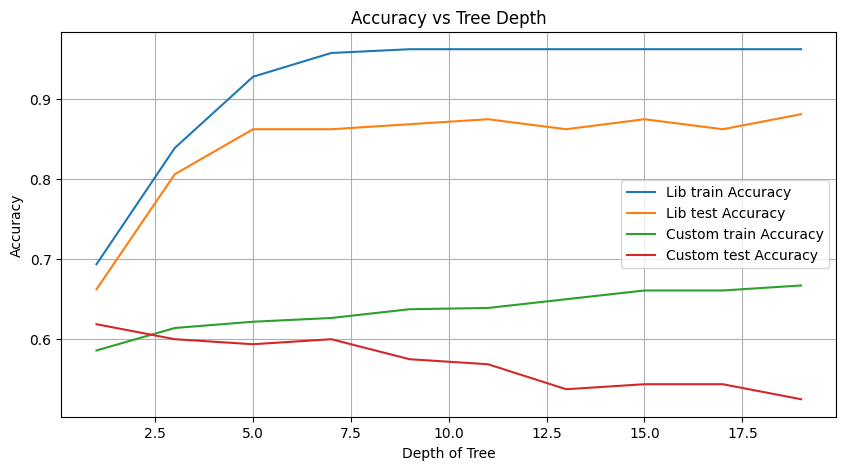

In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
depths = range(1, 20, 2)

for depth in tqdm(depths):
    for dt in [
        DecisionTreeClassifier(**lib_search.best_params_),
        CustomDecisionTreeClassifier(**custom_search.best_params_),
    ]:
        dt.set_params(max_depth=depth)
        dt.fit(X_train, y_train)
        train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(depths, train_accuracies[::2], label="Lib train Accuracy")
plt.plot(depths, test_accuracies[::2], label="Lib test Accuracy")
plt.plot(depths, train_accuracies[1::2], label="Custom train Accuracy")
plt.plot(depths, test_accuracies[1::2], label="Custom test Accuracy")
plt.title("Accuracy vs Tree Depth")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## n_estimators / acc plot

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from boosting import CustomGradientBoostingClassifier

param_grid = {
    "n_estimators": [10, 20, 40],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}

lib_tree = GradientBoostingClassifier()
lib_search = GridSearchCV(
    estimator=lib_tree, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1
)
lib_search.fit(X_train, y_train)

lib_tree = lib_search.best_estimator_
print("Best parameters for lib:", lib_search.best_params_)

custom_tree = CustomGradientBoostingClassifier()
custom_search = GridSearchCV(
    estimator=custom_tree,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)
custom_search.fit(X_train, y_train)

custom_tree = custom_search.best_estimator_
print("Best parameters for custom:", custom_search.best_params_)

Best parameters for lib: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 40}
Best parameters for custom: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}


100%|██████████| 10/10 [00:46<00:00,  4.65s/it]


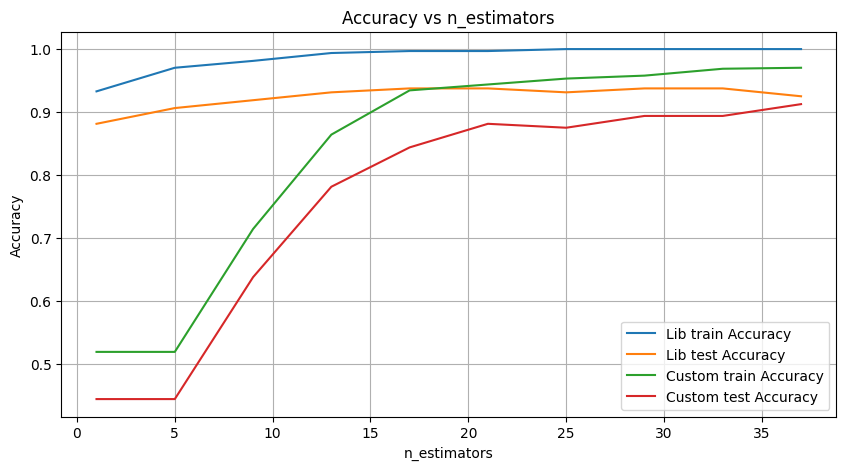

In [18]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
n_estimators = range(1, 40, 4)

for n_estimator in tqdm(n_estimators):
    for dt in [
        GradientBoostingClassifier(**lib_search.best_params_),
        CustomGradientBoostingClassifier(**custom_search.best_params_),
    ]:
        dt.set_params(n_estimators=n_estimator)
        dt.fit(X_train, y_train)
        train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(n_estimators, train_accuracies[::2], label="Lib train Accuracy")
plt.plot(n_estimators, test_accuracies[::2], label="Lib test Accuracy")
plt.plot(n_estimators, train_accuracies[1::2], label="Custom train Accuracy")
plt.plot(n_estimators, test_accuracies[1::2], label="Custom test Accuracy")
plt.title("Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()